In [58]:
#importing libraries

import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
import seaborn as sns

In [59]:
#Suppress warning messages

import warnings
warnings.filterwarnings('ignore')

In [60]:
#Read the data set

os.chdir(r"C:\Users\CC\Downloads")
nza=pd.read_csv('Airlines.csv') 
print(nza) 

      FFP#  AwardMiles  EliteMiles  PartnerMiles  PartnerTrans  \
0        1       28143           0           174             1   
1        2       19244           0           215             2   
2        3       41354           0          4123             4   
3        4       14776           0           500             1   
4        5       97752           0         43300            26   
...    ...         ...         ...           ...           ...   
3994  4017       18476           0          8525             4   
3995  4018       64385           0           981             5   
3996  4019       73597           0         25447             8   
3997  4020       54899           0           500             1   
3998  4021        3016           0             0             0   

      FlyingReturnsMiles  FlightTrans  EnrollDuration  
0                      0            0            7000  
1                      0            0            6968  
2                      0            0  

In [61]:
# Column rename.

nza= nza.rename(columns={'FFP#':'FFP'})

In [62]:
nza

,FFP,AwardMiles,EliteMiles,PartnerMiles,PartnerTrans,FlyingReturnsMiles,FlightTrans,EnrollDuration
0,1,28143,0,174,1,0,0,7000
1,2,19244,0,215,2,0,0,6968
2,3,41354,0,4123,4,0,0,7034
3,4,14776,0,500,1,0,0,6952
4,5,97752,0,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...
3994,4017,18476,0,8525,4,200,1,1403
3995,4018,64385,0,981,5,0,0,1395
3996,4019,73597,0,25447,8,0,0,1402
3997,4020,54899,0,500,1,500,1,1401


In [63]:
# as we know FFP will not make much contribution during clutering. we will drop the column.

#nza1 = nza.drop(['FFP'], axis=1)
#nza1.head()

In [64]:
# Observing the summarized information of data

nza1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   AwardMiles          3999 non-null   int64
 1   EliteMiles          3999 non-null   int64
 2   PartnerMiles        3999 non-null   int64
 3   PartnerTrans        3999 non-null   int64
 4   FlyingReturnsMiles  3999 non-null   int64
 5   FlightTrans         3999 non-null   int64
 6   EnrollDuration      3999 non-null   int64
 7   clustersid          3999 non-null   int32
 8   Cluster             3999 non-null   int64
dtypes: int32(1), int64(8)
memory usage: 265.7 KB


In [65]:
# Looking at the descriptive statistics of the data

nza1.describe()

,AwardMiles,EliteMiles,PartnerMiles,PartnerTrans,FlyingReturnsMiles,FlightTrans,EnrollDuration,clustersid,Cluster
count,3.999000e+03,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000
mean,7.360133e+04,144.114529,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.374594,1.115279
std,1.007757e+05,773.663804,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.560689,0.319398
min,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000,1.000000
25%,1.852750e+04,0.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000,1.000000
50%,4.309700e+04,0.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000,1.000000
75%,9.240400e+04,0.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000,1.000000
max,1.704838e+06,11148.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,2.000000,2.000000


In [66]:
# Finding how many missing values are there for each column

nza1.isnull().sum()

AwardMiles            0
EliteMiles            0
PartnerMiles          0
PartnerTrans          0
FlyingReturnsMiles    0
FlightTrans           0
EnrollDuration        0
clustersid            0
Cluster               0
dtype: int64

There are no Null Values

In [67]:
nza1.duplicated().sum()

1

Since there is only 1 duplicated value.We are not going to remove it

In [68]:
# Finding unique values for each column

nza1.nunique()

AwardMiles            3904
EliteMiles             164
PartnerMiles          2734
PartnerTrans            57
FlyingReturnsMiles     343
FlightTrans             35
EnrollDuration        2820
clustersid               3
Cluster                  2
dtype: int64

# Exploratory Data Analysis

Univariate Analysis

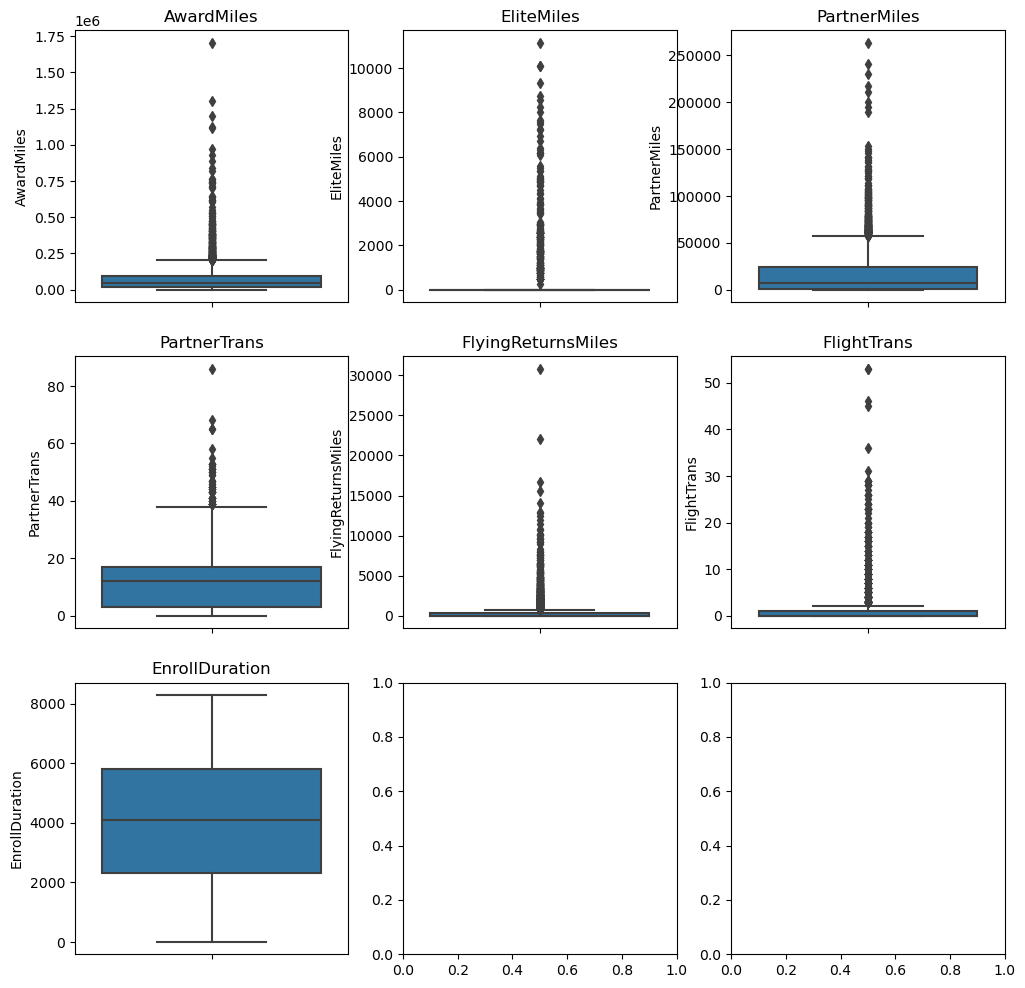

In [69]:
#box plot
fig, ax = plt.subplots(3, 3, figsize=(12, 12))
bp=sns.boxplot(y=nza1.AwardMiles,ax=ax[0, 0])
ax[0, 0].set_title('AwardMiles')
bp=sns.boxplot(y=nza1.EliteMiles,ax=ax[0, 1])
ax[0, 1].set_title('EliteMiles')
bp=sns.boxplot(y=nza1.PartnerMiles,ax=ax[0, 2])
ax[0,2].set_title('PartnerMiles')
bp=sns.boxplot(y=nza1.PartnerTrans,ax=ax[1, 0])
ax[1,0].set_title('PartnerTrans')
bp=sns.boxplot(y=nza1.FlyingReturnsMiles,ax=ax[1,1])
ax[1, 1].set_title('FlyingReturnsMiles')
s=sns.boxplot(y=nza1.FlightTrans,ax=ax[1, 2])
ax[1,2].set_title('FlightTrans')
s=sns.boxplot(y=nza1.EnrollDuration,ax=ax[2,0])
ax[2,0].set_title('EnrollDuration')
plt.show()

From above box-plots we can see that their are so many outliers in our dataset except for the EnrollDuration variable.We are not going to remove it as our dataset is very small (3999 rows only)

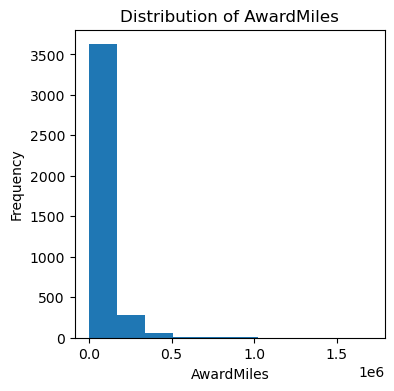

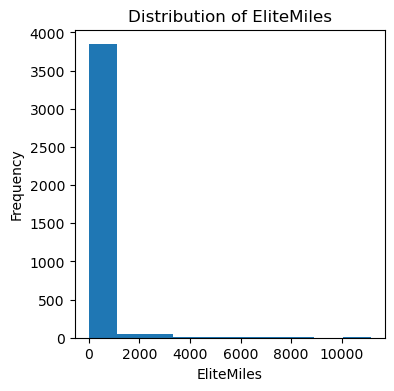

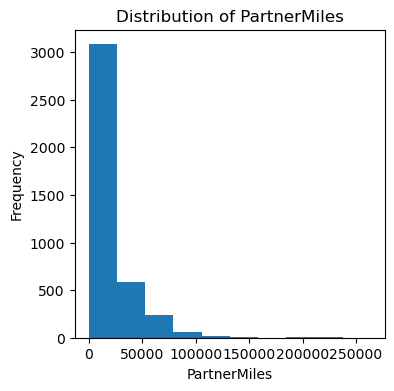

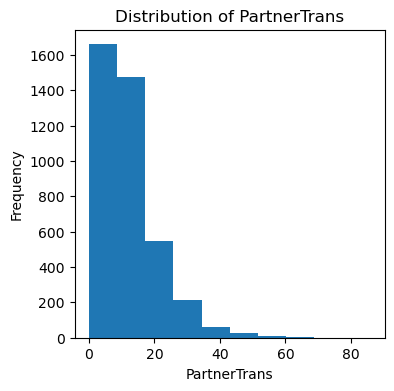

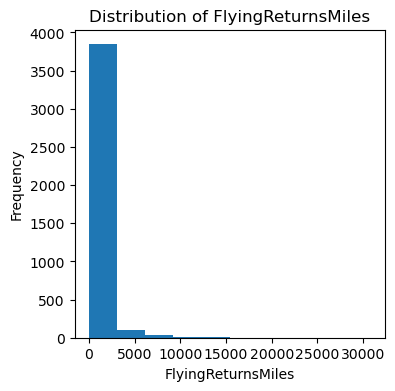

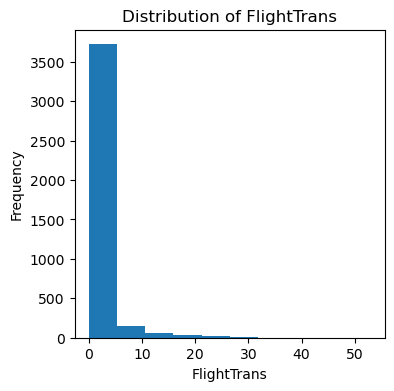

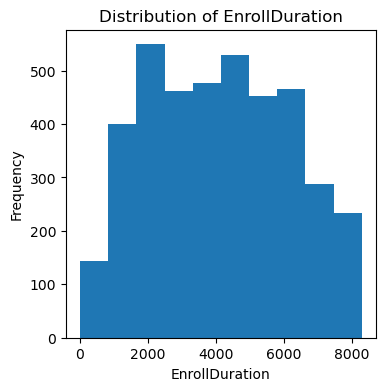

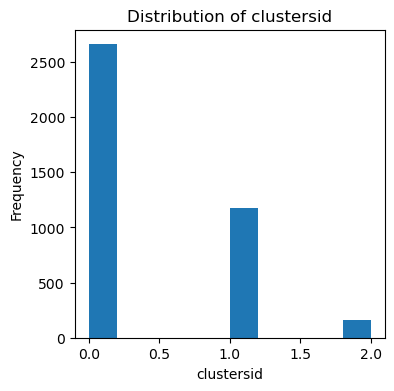

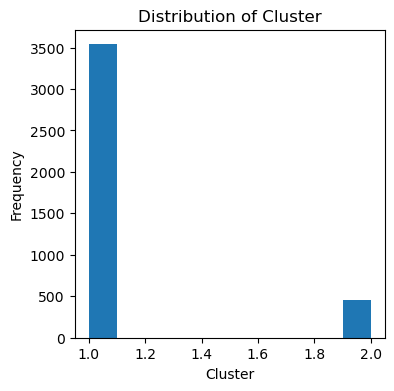

In [70]:
for i in range(len(nza1.columns)):
    nza1[nza1.columns[i]].plot(kind = "hist", bins = 10, figsize = (4,4))
    plt.xlabel(f"{nza1.columns[i]}")
    plt.title(f"Distribution of {nza1.columns[i]}")
    plt.show()

The majority of columns appear to have a positively skewed distribution, except for the EnrollDuration column.

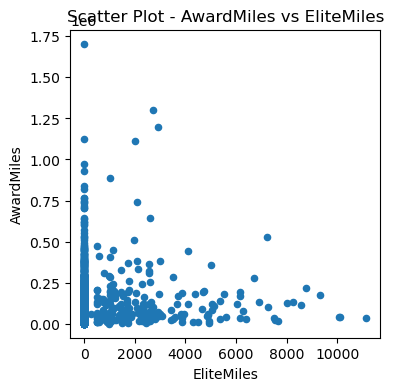

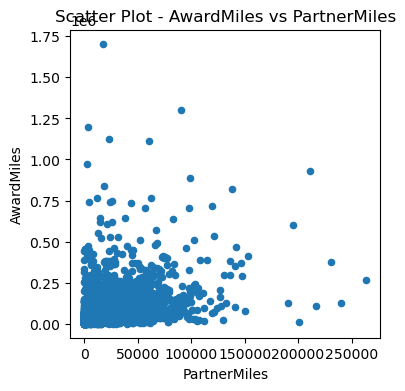

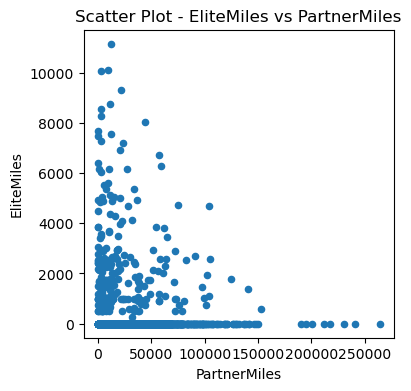

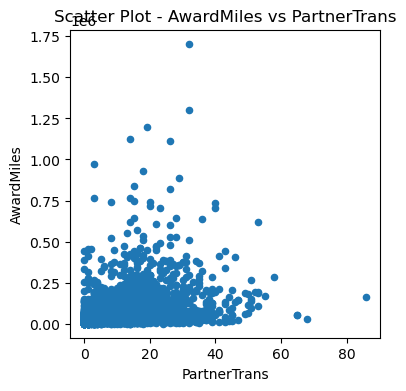

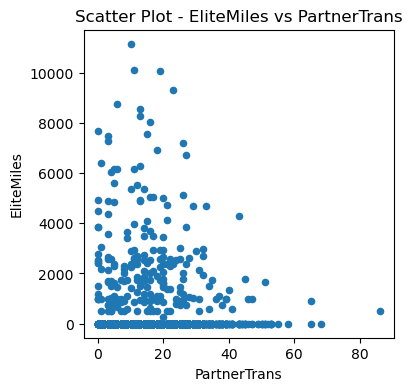

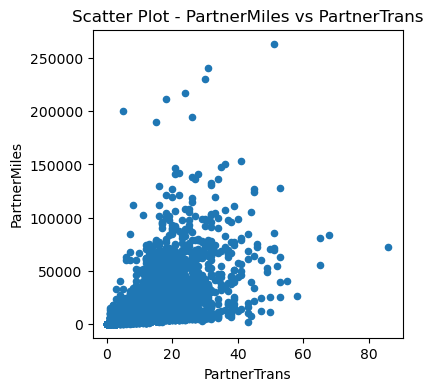

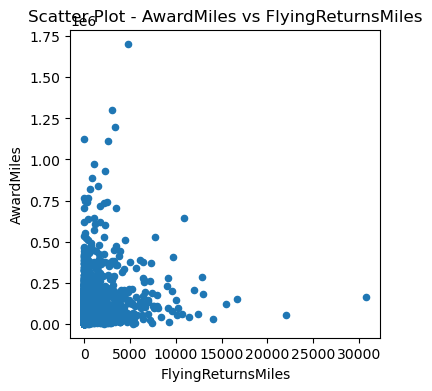

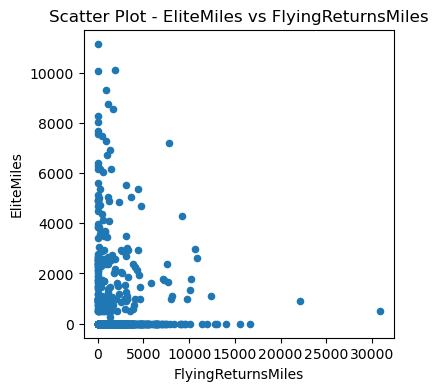

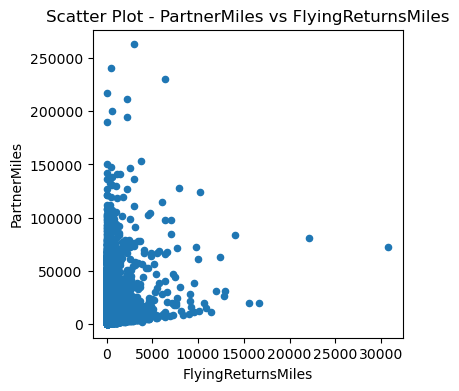

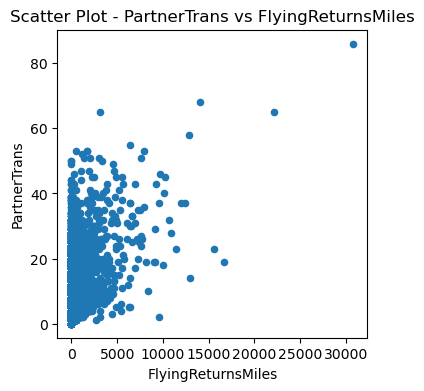

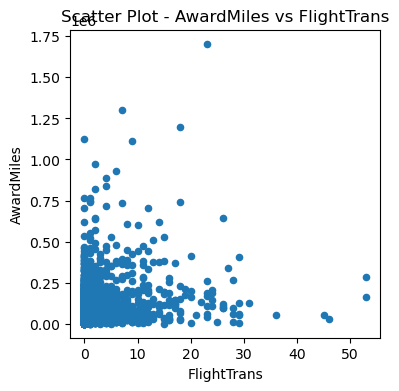

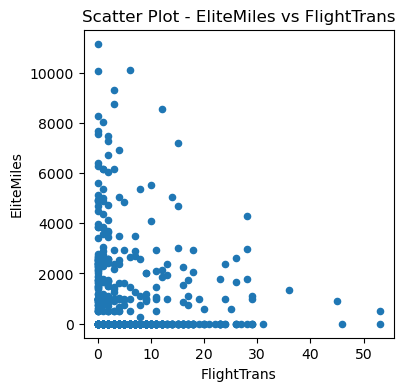

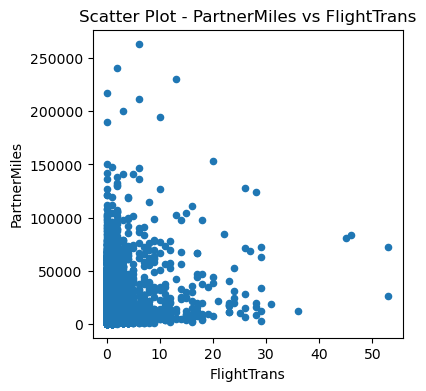

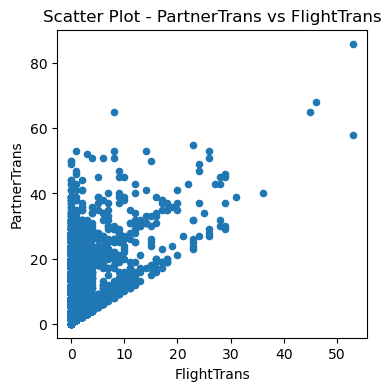

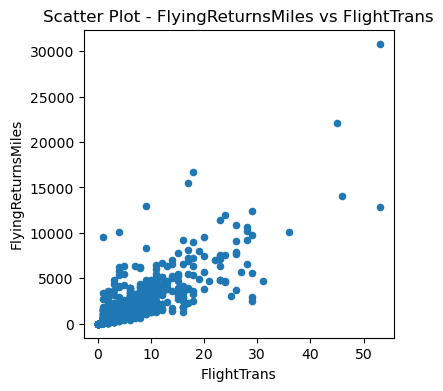

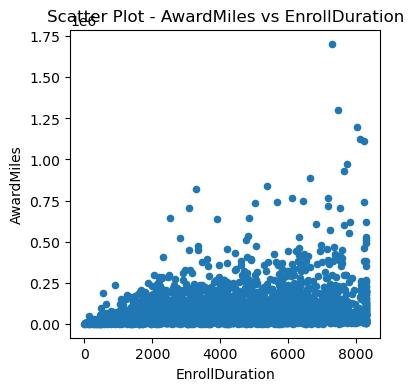

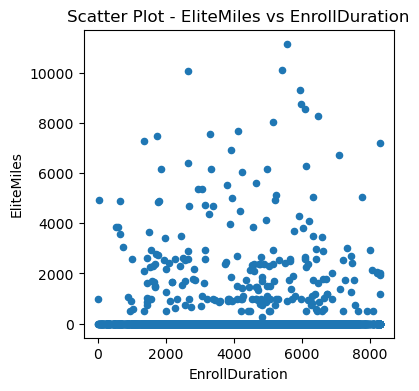

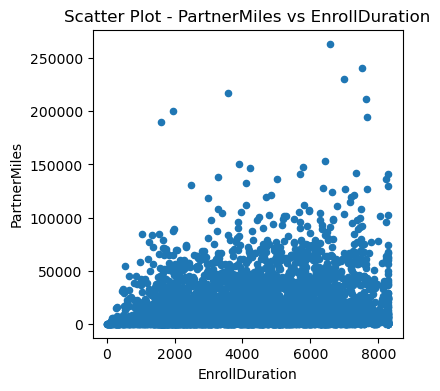

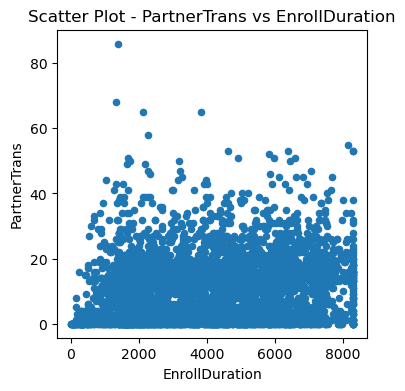

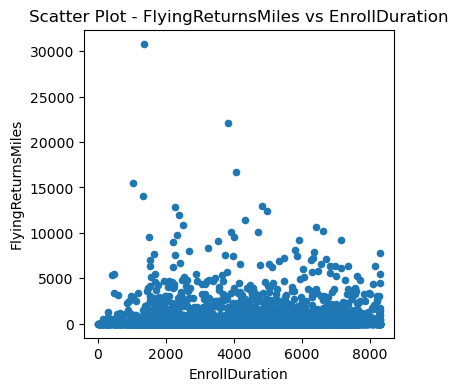

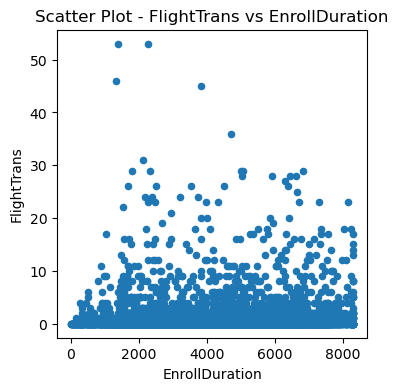

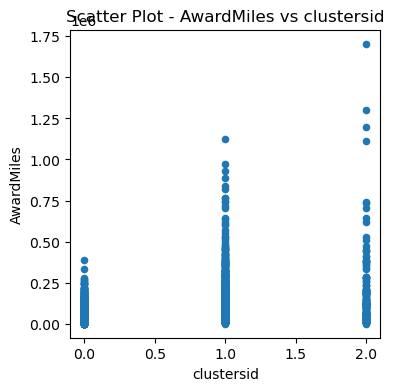

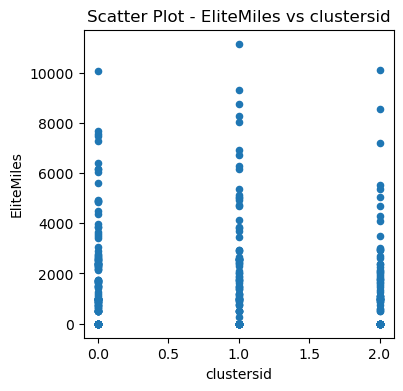

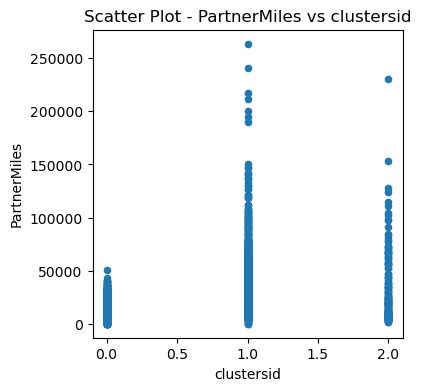

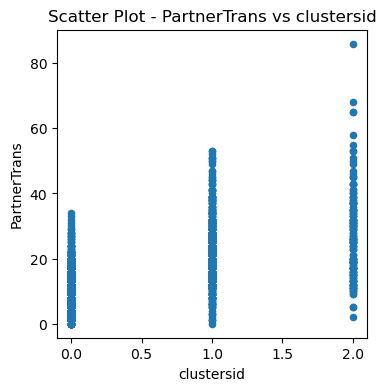

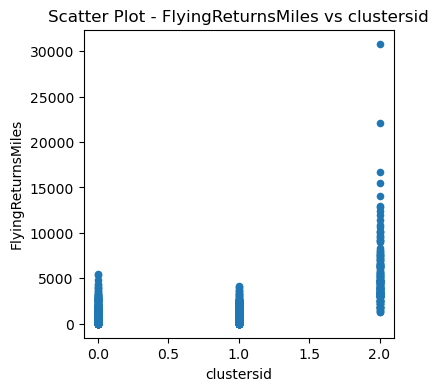

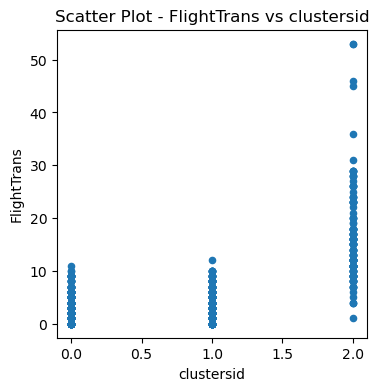

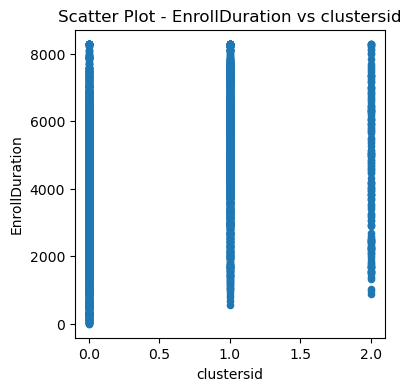

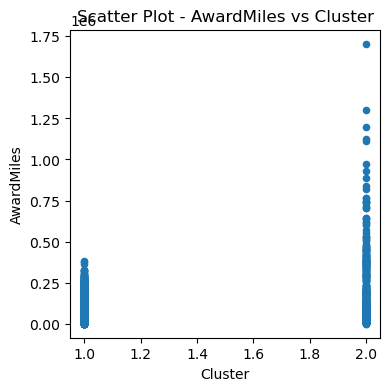

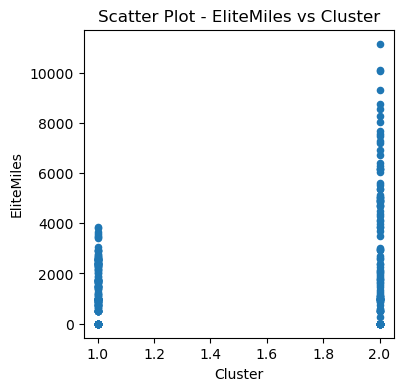

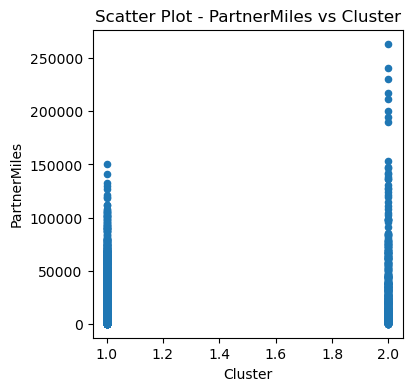

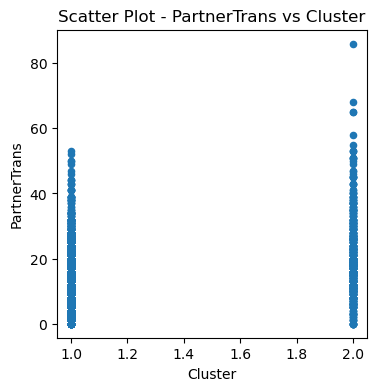

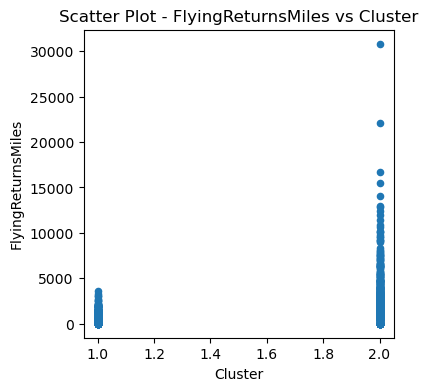

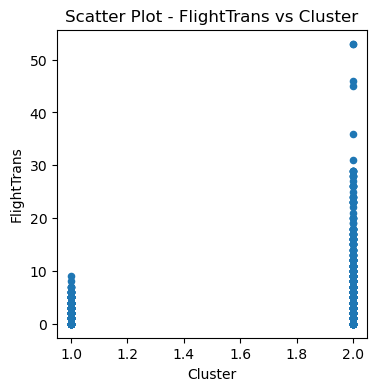

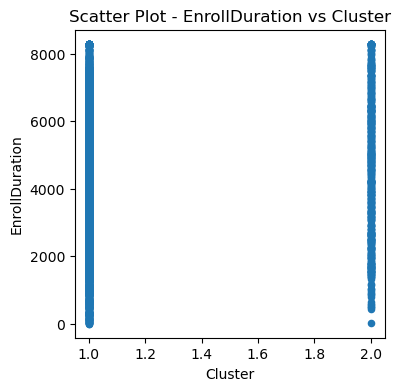

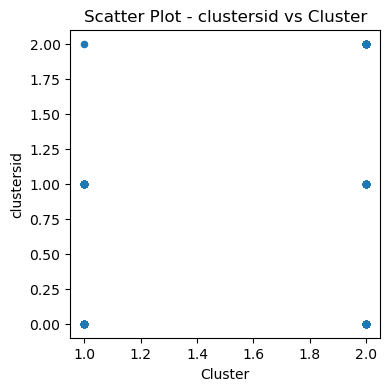

In [71]:
for i in range(len(nza1.columns)):
    for j in range(i):
        nza1.plot(x = nza1.columns[i], y = nza1.columns[j], kind = "scatter", figsize = (4,4))
        plt.xlabel(f"{nza1.columns[i]}")
        plt.ylabel(f"{nza1.columns[j]}")
        plt.title(f"Scatter Plot - {nza1.columns[j]} vs {nza1.columns[i]}")
        plt.show()

In [72]:
#Bivariate analysis

nza1.corr()

,AwardMiles,EliteMiles,PartnerMiles,PartnerTrans,FlyingReturnsMiles,FlightTrans,EnrollDuration,clustersid,Cluster
AwardMiles,1.000000,0.108722,0.403487,0.324935,0.217551,0.255700,0.263129,0.477698,0.422151
EliteMiles,0.108722,1.000000,0.031021,0.050725,0.126774,0.144004,0.017312,0.140681,0.297014
PartnerMiles,0.403487,0.031021,1.000000,0.603180,0.183536,0.185261,0.210397,0.595664,0.247810
PartnerTrans,0.324935,0.050725,0.603180,1.000000,0.377216,0.432364,0.161262,0.670950,0.339339
FlyingReturnsMiles,0.217551,0.126774,0.183536,0.377216,1.000000,0.869193,0.037271,0.492850,0.627411
FlightTrans,0.255700,0.144004,0.185261,0.432364,0.869193,1.000000,0.059260,0.530449,0.662050
EnrollDuration,0.263129,0.017312,0.210397,0.161262,0.037271,0.059260,1.000000,0.328302,0.087635
clustersid,0.477698,0.140681,0.595664,0.670950,0.492850,0.530449,0.328302,1.000000,0.480901
Cluster,0.422151,0.297014,0.247810,0.339339,0.627411,0.662050,0.087635,0.480901,1.000000


<AxesSubplot:>

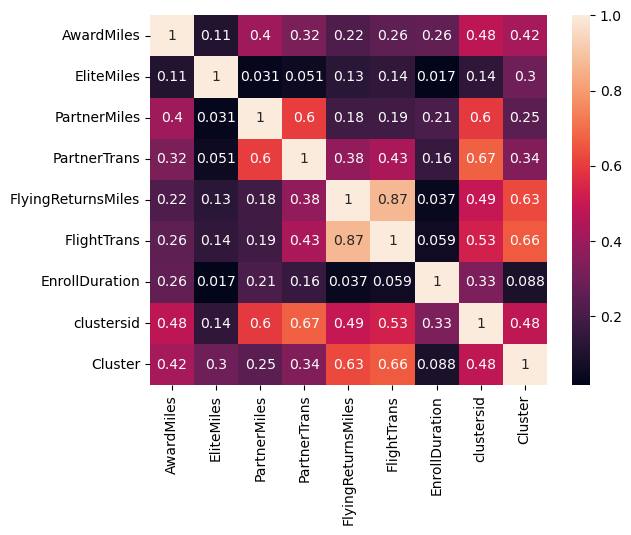

In [73]:
sns.heatmap(np.abs(nza1.corr()),annot= True)

We can't see much strong correlation among the attributes. Hence we will not drop any column.

# Standardising the data

In [74]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
nza_data = standard_scaler.fit_transform(nza1)

# Determining the optimal number of clusters using an elbow plot

In [75]:
wcss = []
k = list(range(1, 11))
for i in k:
    kmeans_cluster = KMeans(n_clusters = i)
    kmeans_cluster.fit(nza_data)
    wcss.append(kmeans_cluster.inertia_)

In [76]:
wcss

[35990.999999999985,
 25851.65391764428,
 20354.105465094544,
 17662.07210909501,
 15394.221789603696,
 13709.893196521976,
 12111.56546161279,
 11402.954938123134,
 10701.275896256702,
 9932.372973715586]

Text(0.5, 1.0, 'Elbow Plot')

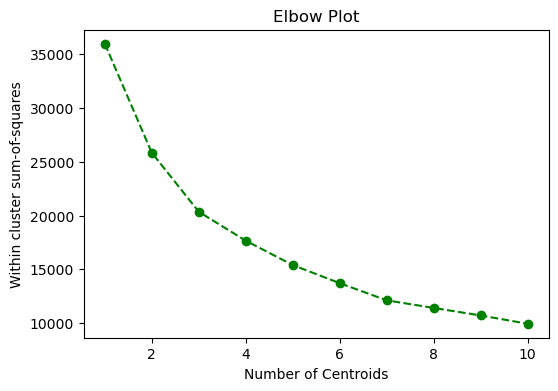

In [77]:
plt.figure(figsize = (6,4))
plt.plot(k, wcss, 'go--')
plt.xlabel('Number of Centroids')
plt.ylabel('Within cluster sum-of-squares')
plt.title('Elbow Plot')

# Fitting the optimal clusters on data

In [78]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(nza_data)

KMeans(n_clusters=3)

In [79]:
kmeans.cluster_centers_

array([[ 0.3344772 , -0.07891682,  0.93046197,  0.80598539, -0.17655702,
        -0.18183633,  0.53577224,  1.11556469, -0.34187719],
       [ 1.26574717,  0.87605204,  0.67939076,  1.0209406 ,  1.84799376,
         1.93644606,  0.29724038,  1.46898712,  2.75571248],
       [-0.33725101, -0.11530246, -0.46675685, -0.47605303, -0.23938794,
        -0.25205275, -0.25317711, -0.66817909, -0.32706632]])

In [80]:
y=pd.DataFrame(kmeans.fit_predict(nza_data),columns=['clustersid'])
y['clustersid'].value_counts()

0    2586
1     984
2     429
Name: clustersid, dtype: int64

In [81]:
# Adding clusters to dataset

nza1['clustersid']=kmeans.labels_
nza1

,AwardMiles,EliteMiles,PartnerMiles,PartnerTrans,FlyingReturnsMiles,FlightTrans,EnrollDuration,clustersid,Cluster
0,28143,0,174,1,0,0,7000,0,1
1,19244,0,215,2,0,0,6968,0,1
2,41354,0,4123,4,0,0,7034,0,1
3,14776,0,500,1,0,0,6952,0,1
4,97752,0,43300,26,2077,4,6935,2,2
...,...,...,...,...,...,...,...,...,...
3994,18476,0,8525,4,200,1,1403,0,1
3995,64385,0,981,5,0,0,1395,0,1
3996,73597,0,25447,8,0,0,1402,0,1
3997,54899,0,500,1,500,1,1401,0,1


In [82]:
nza1.groupby('clustersid').agg(['mean']).reset_index()

,clustersid,AwardMiles,EliteMiles,PartnerMiles,PartnerTrans,FlyingReturnsMiles,FlightTrans,EnrollDuration,Cluster
,,mean,mean,mean,mean,mean,mean,mean,mean
0,0,39618.882831,54.920340,5873.626063,7.030549,124.904486,0.417633,3595.779969,1.010828
1,1,107304.275407,83.067073,39613.593496,19.341463,212.869919,0.683943,5224.862805,1.006098
2,2,201141.890443,821.799534,33550.738928,21.405594,3047.310023,8.717949,4732.324009,1.995338


# Clusters Analysis

<AxesSubplot:xlabel='clustersid', ylabel='AwardMiles'>

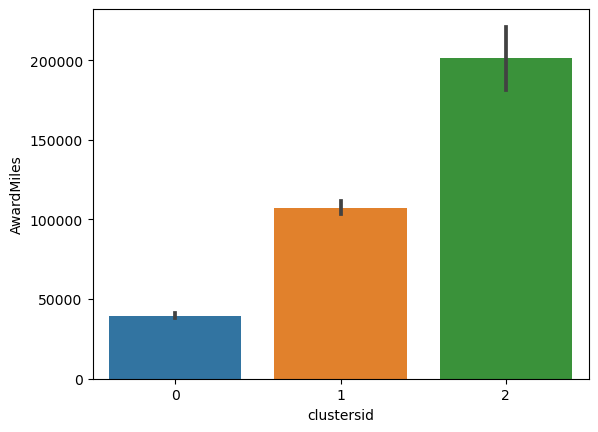

In [83]:
sns.barplot(data=nza1,x='clustersid',y='AwardMiles')

People in Cluster 1 require highest number of miles to be eligible for award travel

<AxesSubplot:xlabel='clustersid', ylabel='EliteMiles'>

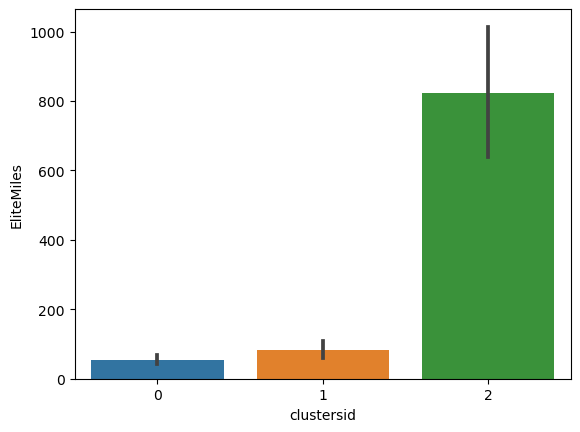

In [84]:
sns.barplot(data=nza1,x='clustersid',y='EliteMiles')

Cluster 0 contains people who has most number of miles to qualify for elite flight status 

<AxesSubplot:xlabel='clustersid', ylabel='PartnerMiles'>

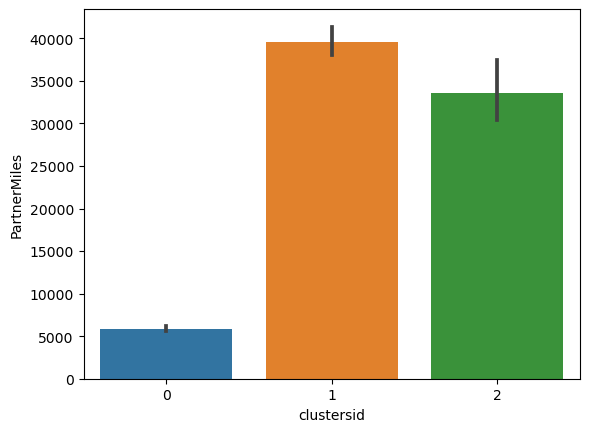

In [85]:
sns.barplot(data=nza1,x='clustersid',y='PartnerMiles')

Cluster 2 people have the highest number of miles obtained from miles earned from transactions while using partner’s services in the past 12 months

<AxesSubplot:xlabel='clustersid', ylabel='PartnerTrans'>

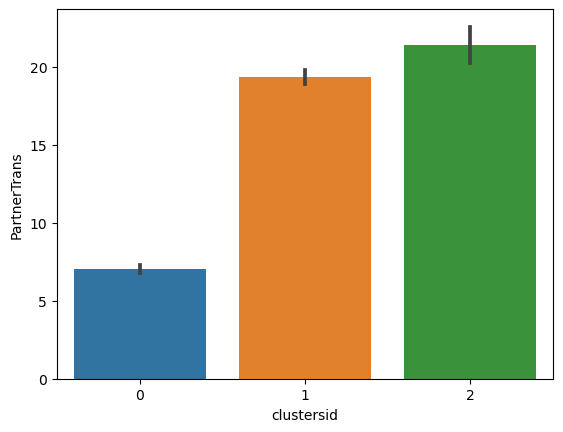

In [86]:
sns.barplot(data=nza1,x='clustersid',y='PartnerTrans')

Cluster 0 people have the highest Number of transactions made at partner’s in the past 12 months

<AxesSubplot:xlabel='clustersid', ylabel='FlyingReturnsMiles'>

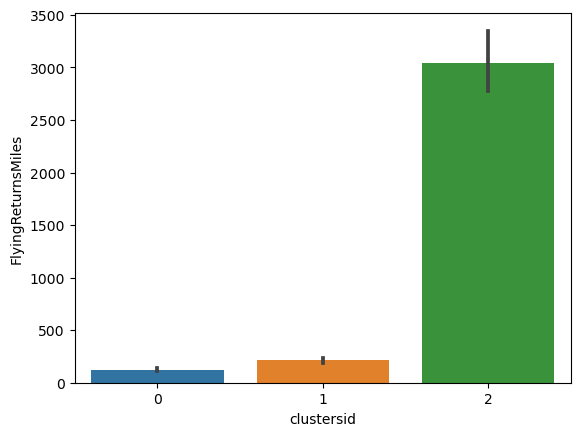

In [87]:
sns.barplot(data=nza1,x='clustersid',y='FlyingReturnsMiles')

Cluster 0 people have highest number of flightreturns miles in the past 12 months, whereas we can see that flightreturns miles are low
for cluster 1 people, hence they can be made to earn more flight miles through the Number of transactions made at partner’s, so that they fly, and increase the business for the airline

<AxesSubplot:xlabel='clustersid', ylabel='FlightTrans'>

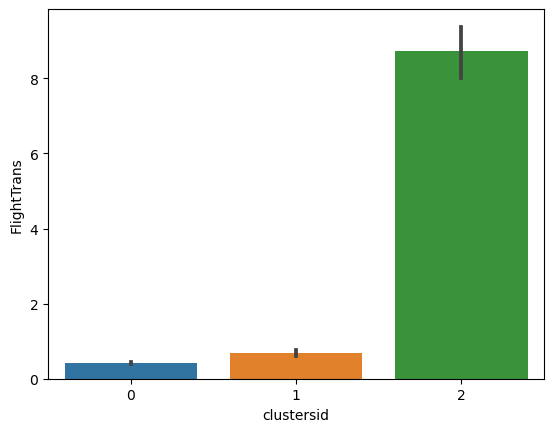

In [88]:
sns.barplot(data=nza1,x='clustersid',y='FlightTrans')

Cluster 0 people have highest number of flight transactions in the past 12 months, whereas we can see that flight miles are low
for cluster 1 people

<AxesSubplot:xlabel='clustersid', ylabel='EnrollDuration'>

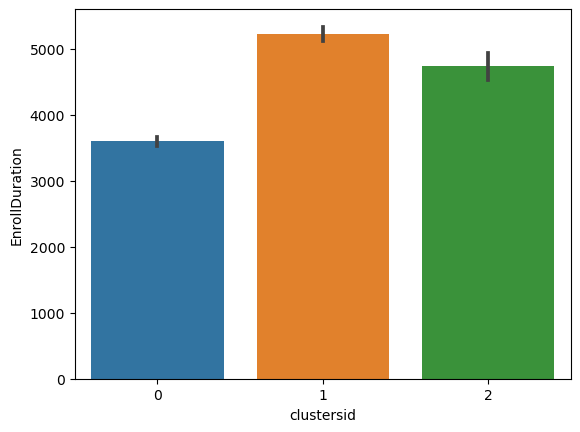

In [89]:
sns.barplot(data=nza1,x='clustersid',y='EnrollDuration')

In Cluster 2, people have enrolled in the flight program for a very long time, longer than others, which is why they are being
offered more flight miles through transactions while using partner’s services, so that they can increase the frequency of flying for customers who have been enrolled for a long time. This didn't have much effect on the people though. The flying miles for Cluster 1 are still quite less.

# Dimensionality Reduction for Visualization

In [90]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=2)

pca.fit(nza_data)
pcs = pca.transform(nza_data)

df_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
df_pca.head()

,PC 1,PC 2
0,-1.275928,-0.144604
1,-1.265604,-0.141979
2,-1.067936,-0.335727
3,-1.314984,-0.107446
4,3.406116,-0.168812


In [91]:
df_pca['clustersid'] = nza1['clustersid']
df_pca.head(2)

,PC 1,PC 2,clustersid
0,-1.275928,-0.144604,0
1,-1.265604,-0.141979,0


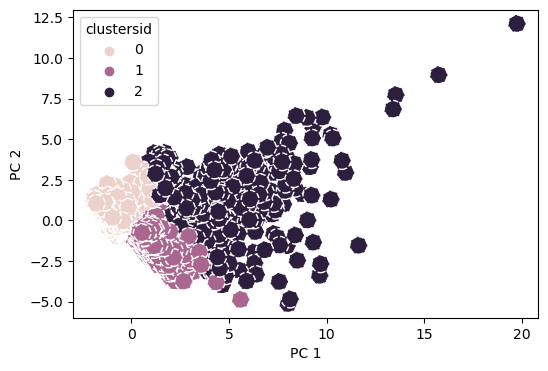

In [92]:
fig, ax = plt.subplots(figsize=(6,4))

sns.scatterplot(
    x='PC 1', y='PC 2',
    hue='clustersid',
    linestyle='--',
    data=df_pca,
    s=160,
    ax=ax
)

plt.show()

Observations:
    
    Cluster 0 (middle value customer):
        1.As potential customers, airline can encourage these customers to increase transactions
        
    Cluster 1 (low value customer):
        2.Airline needs to increase interaction with these customers and needs to take certain marketing strategies to extend this customer cycle
        
    Cluster 2 (middle and high value customers):
        3.They are the most ideal type of customers, they contribute the most to the airline. Airline needs to provide special management for these customers and improve their satisfaction

        

# 2)Hierarchical Clustering

In [93]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

# Plotting the dendrogram

In [94]:
#cluster = linkage(nza_data, method = 'ward')
#plt.figure(figsize = (8,6))
#dendrogram(cluster)
#plt.show()

In [95]:
cluster = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
cluster.fit_predict(nza_data)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [96]:
nza1['Cluster'] = cluster.labels_ + 1

In [97]:
nza1.head()

,AwardMiles,EliteMiles,PartnerMiles,PartnerTrans,FlyingReturnsMiles,FlightTrans,EnrollDuration,clustersid,Cluster
0,28143,0,174,1,0,0,7000,0,1
1,19244,0,215,2,0,0,6968,0,1
2,41354,0,4123,4,0,0,7034,0,1
3,14776,0,500,1,0,0,6952,0,1
4,97752,0,43300,26,2077,4,6935,2,2


# Box Plots visualized with clusters

<AxesSubplot:xlabel='Cluster', ylabel='AwardMiles'>

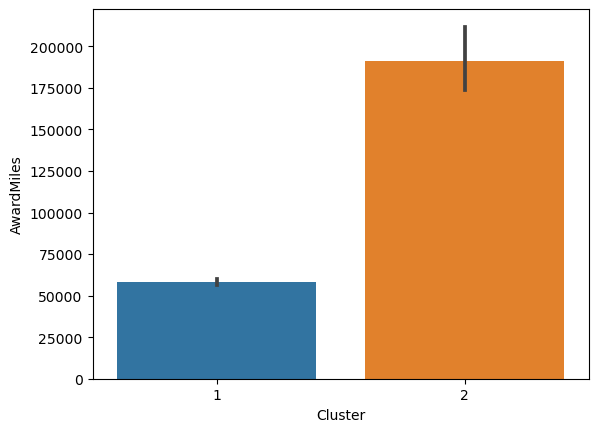

In [98]:
sns.barplot(data=nza1,x='Cluster',y='AwardMiles')

People in Cluster 1 require highest number of miles to be eligible for award travel

<AxesSubplot:xlabel='Cluster', ylabel='EliteMiles'>

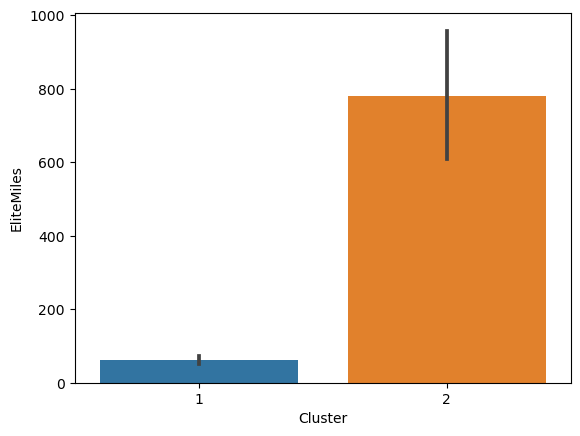

In [99]:
sns.barplot(data=nza1,x='Cluster',y='EliteMiles')

Cluster 2 contains people who has most number of miles to qualify for elite flight status 

<AxesSubplot:xlabel='Cluster', ylabel='PartnerMiles'>

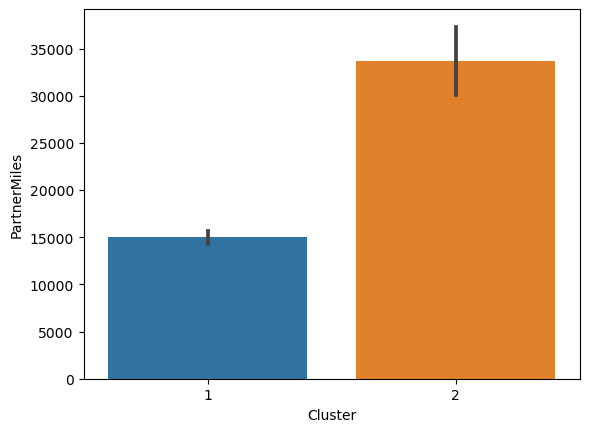

In [100]:
sns.barplot(data=nza1,x='Cluster',y='PartnerMiles')

Cluster 2 people have the highest number of miles obtained from miles earned from transactions while using partner’s services in the past 12 months

<AxesSubplot:xlabel='Cluster', ylabel='PartnerTrans'>

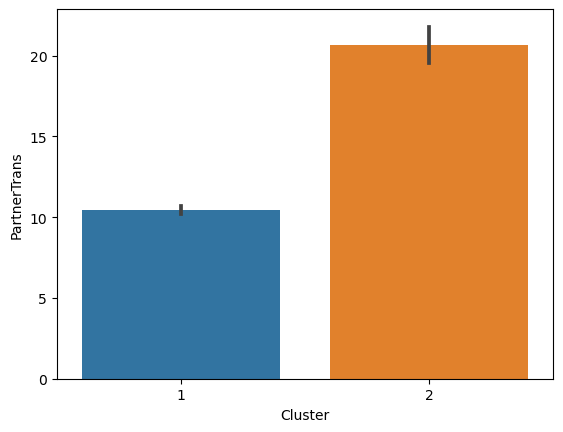

In [101]:
sns.barplot(data=nza1,x='Cluster',y='PartnerTrans')

Cluster 2 people have the highest Number of transactions made at partner’s in the past 12 months

<AxesSubplot:xlabel='Cluster', ylabel='FlyingReturnsMiles'>

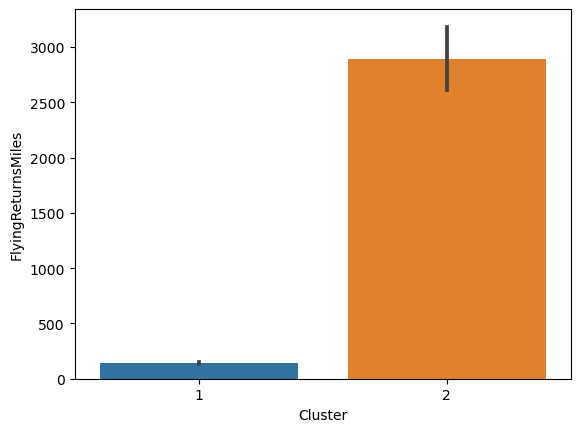

In [102]:
sns.barplot(data=nza1,x='Cluster',y='FlyingReturnsMiles')

Cluster 2 people have highest number of flightreturns miles in the past 12 months, whereas we can see that flightreturns miles are low for cluster 1 people

<AxesSubplot:xlabel='Cluster', ylabel='FlightTrans'>

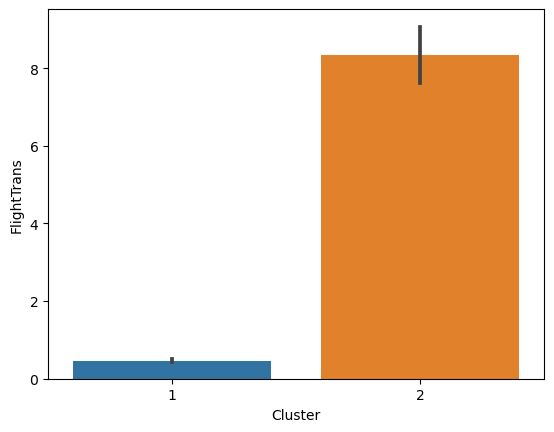

In [103]:
sns.barplot(data=nza1,x='Cluster',y='FlightTrans')

Cluster 2 people have highest number of flight transactions in the past 12 months, whereas we can see that flight miles are low
for cluster 1 people

<AxesSubplot:xlabel='Cluster', ylabel='EnrollDuration'>

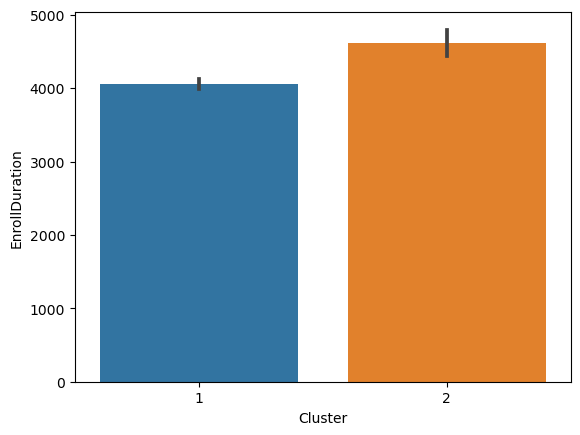

In [104]:
sns.barplot(data=nza1,x='Cluster',y='EnrollDuration')

In Cluster 2, people have enrolled in the flight program for a very long time, longer than others